In [1]:
print("Hej")

Hej


In [13]:
from cameo.strain_design.heuristic.evolutionary.objective_functions import product_yield
from cameo.strain_design.heuristic.evolutionary_based import CofactorSwapOptimization
from cobra.io import read_sbml_model
model = read_sbml_model('../../models/iMM904_progesterone.xml')
import pandas as pd

In [2]:
model.reactions.ERGSTAT_SC

Reaction identifier,ERGSTAT_SC
Name,Acyl CoAergosterol acyltransferase yeast specific
Memory address,0x07f3db0e0e7c0
Stoichiometry,0.01 ergst_c + 0.655 hdcoa_c + 0.01 hexccoa_c + 0.27 odecoa_c + 0.02 pmtcoa_c + 0.03 stcoa_c + 0.015 tdcoa_c --> coa_c + 0.01 ergstest_SC_c 0.01 Ergosterol C28H44O + 0.655 Hexadecenoyl-CoA (n-C16:1CoA) + 0.01 Hexacosanoyl CoA n C260CoA C47H82N7O17P3S + 0.27 Octadecenoyl-CoA (n-C18:1CoA) + 0.02 Palmitoyl-CoA (n-C16:0CoA) + 0.03...
GPR,YCR048W or YNR019W
Lower bound,0.0
Upper bound,999999.0


In [37]:
model.genes.YMR202W

Gene identifier,YMR202W
Name,ERG2
Memory address,0x07f3db09d2940
Functional,True
In 3 reaction(s),"C8STI, R04804, R03353"


In [16]:
erg_c_info = model.metabolites.ergst_c
erg_c_info

Metabolite identifier,ergst_c
Name,Ergosterol C28H44O
Memory address,0x07f3db005aee0
Formula,C28H44O
Compartment,c
In 6 reaction(s),"ERGSTt, BIOMASS_SC5_notrace, ERGSTGLCT, ERGSTESTH_SC, ERGSTAT_SC, ERGSTter"


In [24]:
erg_c_info

Metabolite identifier,ergst_c
Name,Ergosterol C28H44O
Memory address,0x07f3db005aee0
Formula,C28H44O
Compartment,c
In 6 reaction(s),"ERGSTt, BIOMASS_SC5_notrace, ERGSTGLCT, ERGSTESTH_SC, ERGSTAT_SC, ERGSTter"


In [34]:
rea = erg_c_info.reactions
rea

frozenset({<Reaction BIOMASS_SC5_notrace at 0x7f3daac98d30>,
           <Reaction ERGSTAT_SC at 0x7f3dad78eeb0>,
           <Reaction ERGSTESTH_SC at 0x7f3dad79c0a0>,
           <Reaction ERGSTGLCT at 0x7f3dad79c940>,
           <Reaction ERGSTt at 0x7f3dad78ea30>,
           <Reaction ERGSTter at 0x7f3dad77dfd0>})

TypeError: 'frozenset' object is not subscriptable

In [20]:
model.genes.YMR015C

Gene identifier,YMR015C
Name,ERG5
Memory address,0x07f3db09d2250
Functional,True
In 2 reaction(s),"C22STDSx, C22STDS"


In [21]:
model.reactions.C22STDSx

Reaction identifier,C22STDSx
Name,C 22 sterol desaturase NAD
Memory address,0x07f3dafa5c9a0
Stoichiometry,ergtrol_c + h_c + nadh_c + o2_c --> ergtetrol_c + 2.0 h2o_c + nad_c Ergosta 5 7 24 28 trienol C28H44O + H+ + Nicotinamide adenine dinucleotide - reduced + O2 O2 --> Ergosta 5 7 22 24 28 tetraen 3beta ol C28H42O + 2.0 H2O H2O + Nicotinamide adenine dinucleotide
GPR,(YIL043C and YNL111C and YMR015C) or (YNL111C and YMR015C and YKL150W)
Lower bound,0.0
Upper bound,999999.0


In [22]:
model.metabolites.ergtetrol_c 

Metabolite identifier,ergtetrol_c
Name,Ergosta 5 7 22 24 28 tetraen 3beta ol C28H42O
Memory address,0x07f3db005a250
Formula,C28H42O
Compartment,c
In 4 reaction(s),"ERGTETROLter, C22STDSx, C22STDS, CHLSTI"


In [10]:
reactions=model.metabolites.ergst_c
reactions

Metabolite identifier,ergst_c
Name,Ergosterol C28H44O
Memory address,0x07f3db166b820
Formula,C28H44O
Compartment,c
In 6 reaction(s),"BIOMASS_SC5_notrace, ERGSTGLCT, ERGSTt, ERGSTESTH_SC, ERGSTter, ERGSTAT_SC"


In [12]:
type(reactions)

cobra.core.metabolite.Metabolite

In [8]:
reactions

NameError: name 'reactions' is not defined

In [ ]:
for t in reactions:
    print("Reactions:")
    for id in t:
        r=model.reactions.get_by_id(id)
        #print(r.name, id+",","Fitness:", solution.data_frame.fitness[id][10])
        s=""
        for rea in range(len(r.reactants)):
            if rea==len(r.reactants)-1:
                s+=r.reactants[rea].name+" ==> "
            else:
                s+=r.reactants[rea].name+" + "
        for p in range(len(r.products)):
            if p==len(r.products)-1:
                s+=r.products[p].name
            else:
                s+=r.products[p].name+" + "
        print(s)
        print()

In [4]:
from cameo.flux_analysis.analysis import phenotypic_phase_plane
from cobra.flux_analysis import production_envelope

In [29]:
yeast_model.add_boundary(yeast_model.metabolites.get_by_id("progesterone_c"), type="demand")

Reaction identifier,DM_progesterone_c
Name,progesterone demand
Memory address,0x07f375e67c070
Stoichiometry,progesterone_c --> progesterone -->
GPR,
Lower bound,0
Upper bound,1000.0


In [30]:
new_medium = yeast_model.medium
new_medium['EX_glc__D_e'] = 100.
new_medium['EX_o2_e'] = 100.
yeast_model.medium = new_medium

In [31]:
yeast_model = model
# print('complete model: ', yeast_model.optimize())
with yeast_model:
    yeast_model.genes.YMR015C.knock_out()
    yeast_model.genes.YML008C.knock_out()
    print('ERG5 and ERG6 knocked out: ', yeast_model.optimize())
prod_env_prog = production_envelope(yeast_model, ["EX_o2_e", "EX_glc__D_e"], objective=yeast_model.reactions.R07215, carbon_sources="EX_glc__D_e")
progesterone_prod = prod_env_prog['flux_maximum']
o2_input = prod_env_prog['EX_o2_e']
glucose_input = prod_env_prog['EX_glc__D_e']
prod_env_prog


ERG5 and ERG6 knocked out:  <Solution 5.472 at 0x7f375e67cc40>


,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,5.386018,0.430881,NaN,-100.0,-100.000000
1,EX_glc__D_e,0.0,0.0,NaN,5.290090,0.446704,NaN,-100.0,-94.739938
2,EX_glc__D_e,0.0,0.0,NaN,5.194162,0.464387,NaN,-100.0,-89.479876
3,EX_glc__D_e,0.0,0.0,NaN,5.098234,0.484279,NaN,-100.0,-84.219814
4,EX_glc__D_e,0.0,0.0,NaN,5.002306,0.506821,NaN,-100.0,-78.959752
...,...,...,...,...,...,...,...,...,...
395,EX_glc__D_e,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,-21.099071
396,EX_glc__D_e,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,-15.839009
397,EX_glc__D_e,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,-10.578947
398,EX_glc__D_e,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,-5.318885


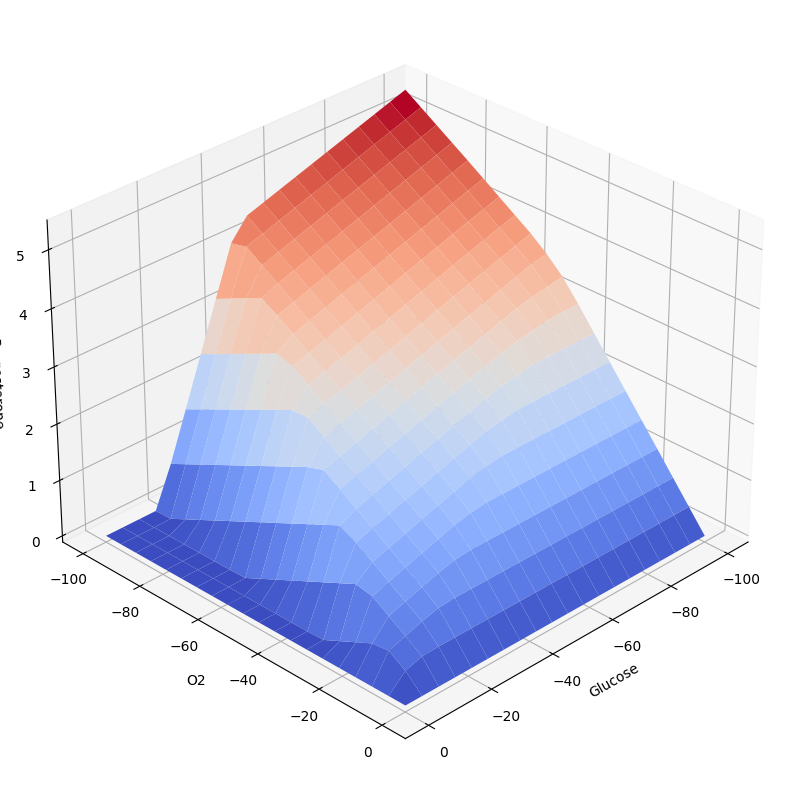

In [32]:
%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
X, Y = np.meshgrid(glucose_input[:20], o2_input[::20])
ax.view_init(30,45)
ax.plot_surface(X,Y, np.nan_to_num(np.array(progesterone_prod).reshape(20,20)), shade=True, cmap=cm.coolwarm)
ax.set_xlabel("Glucose")
ax.set_ylabel("O2")
ax.set_zlabel("Progesterone")
plt.show()

In [33]:
Fluxes=model.optimize()
model.objective = model.reactions.CrtI
py = product_yield(model.reactions.CrtI, model.reactions.r_1714)
swap_optimization = CofactorSwapOptimization(model=model, cofactor_id_swaps=(["FAD_c","FADH2_c"],["NADP_c","NADPH_c"]),objective_function=py)
solution=swap_optimization.run(max_size=10)

/home/rune/miniconda3/lib/python3.9/site-packages/cobra/core/dictlist.py:214: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if current_length is 0:
/home/rune/miniconda3/lib/python3.9/site-packages/cobra/core/dictlist.py:214: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if current_length is 0:
/home/rune/miniconda3/lib/python3.9/site-packages/cobra/core/dictlist.py:214: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if current_length is 0:
/home/rune/miniconda3/lib/python3.9/site-packages/cobra/core/dictlist.py:214: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if current_length is 0:


AttributeError: DictList has no attribute or entry CrtI